In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import datetime as dt
import string

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 15000)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

/Users/abbieschindler/opt/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


### Get data (already processed in other nb)

In [2]:
#create list of dir paths
path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/data_comb'
    
path_file_names = os.listdir(path)

data_paths = []

for file in path_file_names:
    int_path = path + '/' + file
    data_paths.append(int_path)
    
data_paths

['/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/data_comb/data_comb_final_3m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/data_comb/data_RFID_final_1m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/data_comb/data_VDM_tidy_intake_1m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/data_comb/data_VDM_tidy_intake_3m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/data_comb/data_RFID_final_3m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/data_comb/data_comb_final_1m.csv']

#### Combin 1m and 3m data

In [3]:
data_1m = pd.read_csv(data_paths[5])
data_1m = pd.DataFrame(data = data_1m)
data_1m['TP'] = '1m'
print(data_1m.shape)

data_3m = pd.read_csv(data_paths[0])
data_3m = pd.DataFrame(data = data_3m)
data_3m['TP'] = '3m'
print(data_3m.shape)

data_comb_final = pd.concat([data_1m, data_3m], axis=0)
print(data_comb_final.shape)

#data_comb_final = data_comb_final[['Round', 'Cage', 'Animal', 'Injury', 'IdRFID',]]

data_comb_final.tail()

(7635, 40)
(14331, 38)
(21966, 41)


,Unnamed: 0,Round,Cage,Animal,Injury,IdRFID,we_switch,weight_pre,notes,index,Cage_VDM,Cohort,TP,Drink,StartDate,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,ld_seg,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,VDM_RFID_timediff,VDM_day_count,VDM_hour_count,VDM_min_count,drink_bw,Unique
14326,4346,2,2,1007,sham,041A555C80,NaN,43.2,NaN,14327,2,r1,3m,NaN,201127,12/07/20 07:53:32,VDM_H20,0.0200,2020-12-07 07:53:32,1.607328e+09,2020-12-07,7,07:53:32,7,53,light,82.699,041A555C80,RFID8,2020-12-07 07:52:24.335961600,2020-12-07 07:53:47.034961600,NaN,NaN,diff,NaN,0.000000,11,247,14813,0.462963,sham_r2_2
14327,4347,2,2,1007,sham,041A555C80,NaN,43.2,NaN,14328,2,r1,3m,NaN,201127,12/07/20 07:53:35,VDM_H20,0.0200,2020-12-07 07:53:35,1.607328e+09,2020-12-07,7,07:53:35,7,53,light,82.699,041A555C80,RFID8,2020-12-07 07:52:24.335961600,2020-12-07 07:53:47.034961600,NaN,NaN,diff,NaN,0.000000,11,247,14813,0.462963,sham_r2_2
14328,4348,2,2,1007,sham,041A555C80,NaN,43.2,NaN,14329,2,r1,3m,NaN,201127,12/07/20 07:53:43,VDM_H20,0.0200,2020-12-07 07:53:43,1.607328e+09,2020-12-07,7,07:53:43,7,53,light,82.699,041A555C80,RFID8,2020-12-07 07:52:24.335961600,2020-12-07 07:53:47.034961600,NaN,NaN,diff,NaN,0.000000,11,247,14813,0.462963,sham_r2_2
14329,8561,2,1,1020,blast,041A55553F,NaN,30.8,NaN,1484,1,r1,3m,NaN,201127,12/07/20 08:12:21,VDM_20_etoh,0.0048,2020-12-07 08:12:21,1.607329e+09,2020-12-07,7,08:12:21,8,12,light,9.569,041A55553F,RFID3,2020-12-07 06:52:01.191014400,2020-12-07 06:52:10.760014400,NaN,NaN,diff,NaN,4810.239985,11,248,14832,0.155844,blast_r2_3
14330,10606,2,1,1020,blast,041A55553F,NaN,30.8,NaN,14330,1,r1,3m,NaN,201127,12/07/20 08:13:56,VDM_H20,0.0540,2020-12-07 08:13:56,1.607329e+09,2020-12-07,7,08:13:56,8,13,light,0.224,041A55553F,RFID4,2020-12-07 07:03:27.883958399,2020-12-07 07:03:28.107958399,NaN,NaN,diff,NaN,4227.892041,11,248,14833,1.753247,blast_r2_3


### Viz

#### RFID only viz

light


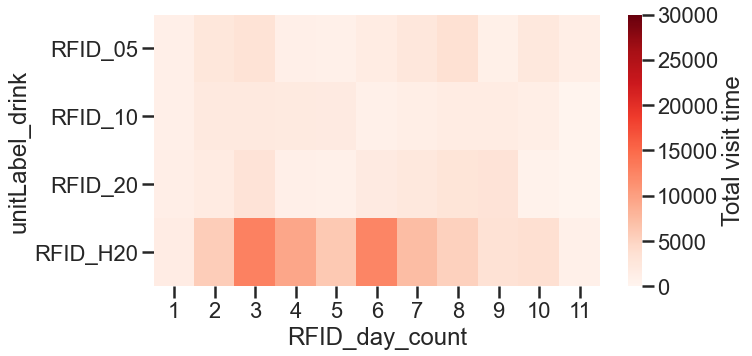

dark


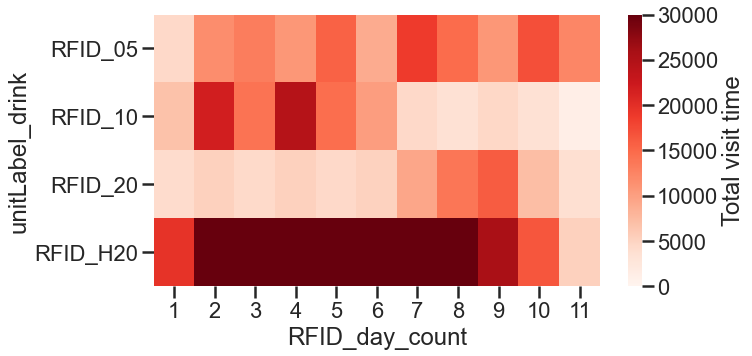

In [62]:
data_int = data_comb_final[data_comb_final['TP'] == '1m']
#data_int = data_int[data_int['RFID_day_count'] < 7]
#data_int = data_int[data_int['unitLabel_drink'] != 'RFID_H20']
#data_int = data_int[data_int['Round'] == 2]

for variable in data_int['ld_seg'].unique():
    print(variable)
    #select variable
    data = data_int[(data_int['ld_seg'] == variable)]
    #compute intake count by cage and hour
    groupby = data.groupby(['unitLabel_drink', 'RFID_day_count'])['eventDuration'].sum().reset_index()
    #viz
    groupby = groupby.pivot('unitLabel_drink', 'RFID_day_count', "eventDuration")
    plt.figure(figsize=(10,5))
    ax = sns.heatmap(groupby, cmap="Reds", vmin=0, vmax=30000, cbar_kws={'label': 'Total visit time'})
    #plt.xlabel('Bottle')
    plt.show()

#### RFID and VDM

dark


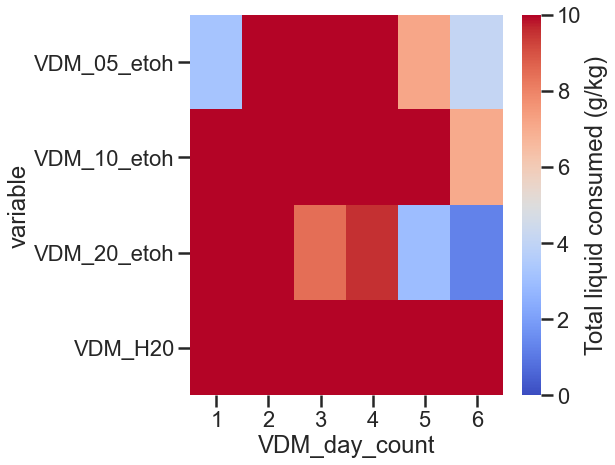

light


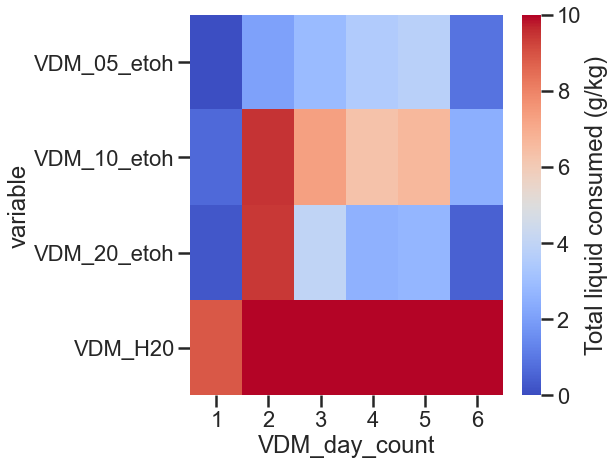

In [99]:
data_int = data_comb_final[(data_comb_final['VDM_RFID_timediff'] < 5) | (data_comb_final['VDM_RFID_timediff'].isna())]
#data_int = data_int[data_int['variable'] != 'VDM_H20']
data_int = data_int[data_int['TP'] == '1m']
#data_int = data_int[data_int['VDM_day_count'] < 6]

for variable in data_int['ld_seg'].unique():
    print(variable)
    #select variable
    data = data_int[(data_int['ld_seg'] == variable)]
    #compute intake count by cage and hour
    groupby = data.groupby(['variable', 'VDM_day_count'])['drink_bw'].sum().reset_index()
    #viz
    groupby = groupby.pivot("variable", "VDM_day_count", "drink_bw")
    plt.figure(figsize=(7,7))
    ax = sns.heatmap(groupby, cmap="coolwarm", vmin=0, vmax=100, cbar_kws={'label': 'Total liquid consumed (g/kg)'})
    plt.show()

In [160]:
data_int.groupby(['Animal', 'Injury', 'variable'])['drink_bw'].sum().reset_index().groupby(['Injury', 'variable'])['drink_bw'].mean().reset_index()

,Injury,variable,drink_bw
0,blast,VDM_05_etoh,9.601568
1,blast,VDM_10_etoh,5.357241
2,blast,VDM_20_etoh,6.251709
3,sham,VDM_05_etoh,3.980525
4,sham,VDM_10_etoh,13.374063
5,sham,VDM_20_etoh,6.025615


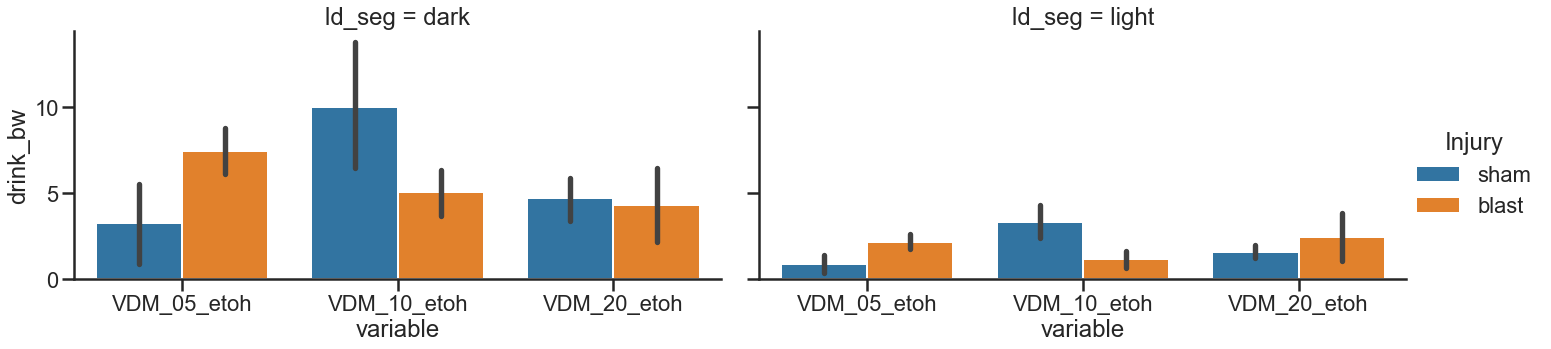

In [167]:
data_int = data_comb_final[(data_comb_final['VDM_RFID_timediff'] < 3) | (data_comb_final['VDM_RFID_timediff'].isna())]
data_int = data_int[data_int['variable'] != 'VDM_H20']
data_int = data_int[data_int['TP'] == '1m']
data_int = data_int[data_int['VDM_day_count'] < 6]

data = data_int.groupby(['ld_seg', 'Animal', 'Injury', 'variable'])['drink_bw'].sum().reset_index()

sns.catplot(x='variable', y='drink_bw', data=data, kind='bar', hue='Injury',
            size=5, ci=68, aspect=2, 
            sharex=True, sharey=True, col='ld_seg')

#### heat map

In [47]:
data_int = data_comb_final[data_comb_final['variable'] != 'VDM_H20']
data_int = data_int[data_int['VDM_RFID_timediff'] < 1]
data_int = data_int[data_int['TP'] == '1m']
#data_int = data_int[data_int['VDM_day_count'] < 7]

for variable in data_int['Injury'].unique():
    print(variable)
    #select variable
    data = data_int[(data_int['Injury'] == variable)]
    #compute intake count by cage and hour
    groupby = data.groupby(['Animal', 'variable', 'VDM_day_count'])['drink_bw'].sum().reset_index().groupby(['variable', 'VDM_day_count'])['drink_bw'].mean().reset_index()
    #viz
    groupby = groupby.pivot("variable", "VDM_day_count", "drink_bw")
    plt.figure(figsize=(5,3))
    ax = sns.heatmap(groupby, cmap="coolwarm", vmin=0, vmax=4)
    plt.show()

KeyError: 'variable'

In [ ]:
data = data_comb_final[data_comb_final['Cage'] == 2]
data = data[data['variable'] != 'VDM_H20']

for variable in data['Injury'].unique():
    print(variable)
    #select variable
    data_int = data[(data['Injury'] == variable)]
    #compute intake count by cage and hour
    groupby = data_int.groupby(['Animal', 'variable', 'day_count'])['drink_bw'].sum().reset_index().groupby(['variable', 'day_count'])['drink_bw'].mean().reset_index()
    #viz
    groupby = groupby.pivot("variable", "day_count", "drink_bw")
    plt.figure(figsize=(5,3))
    ax = sns.heatmap(groupby, cmap="coolwarm", vmin=0, vmax=4)
    plt.show()

#### rasters

In [115]:
data_comb_final[data_comb_final['TP'] == '1m']['IdRFID'].value_counts()

041A555D59    1471
041A555BCC    1241
041A555C80    649 
041A555768    635 
041A55553F    597 
041A55564D    496 
041A5554AF    489 
041A55594C    453 
041A555A78    435 
041A555B76    422 
041A555996    393 
041A555DFF    354 
Name: IdRFID, dtype: int64

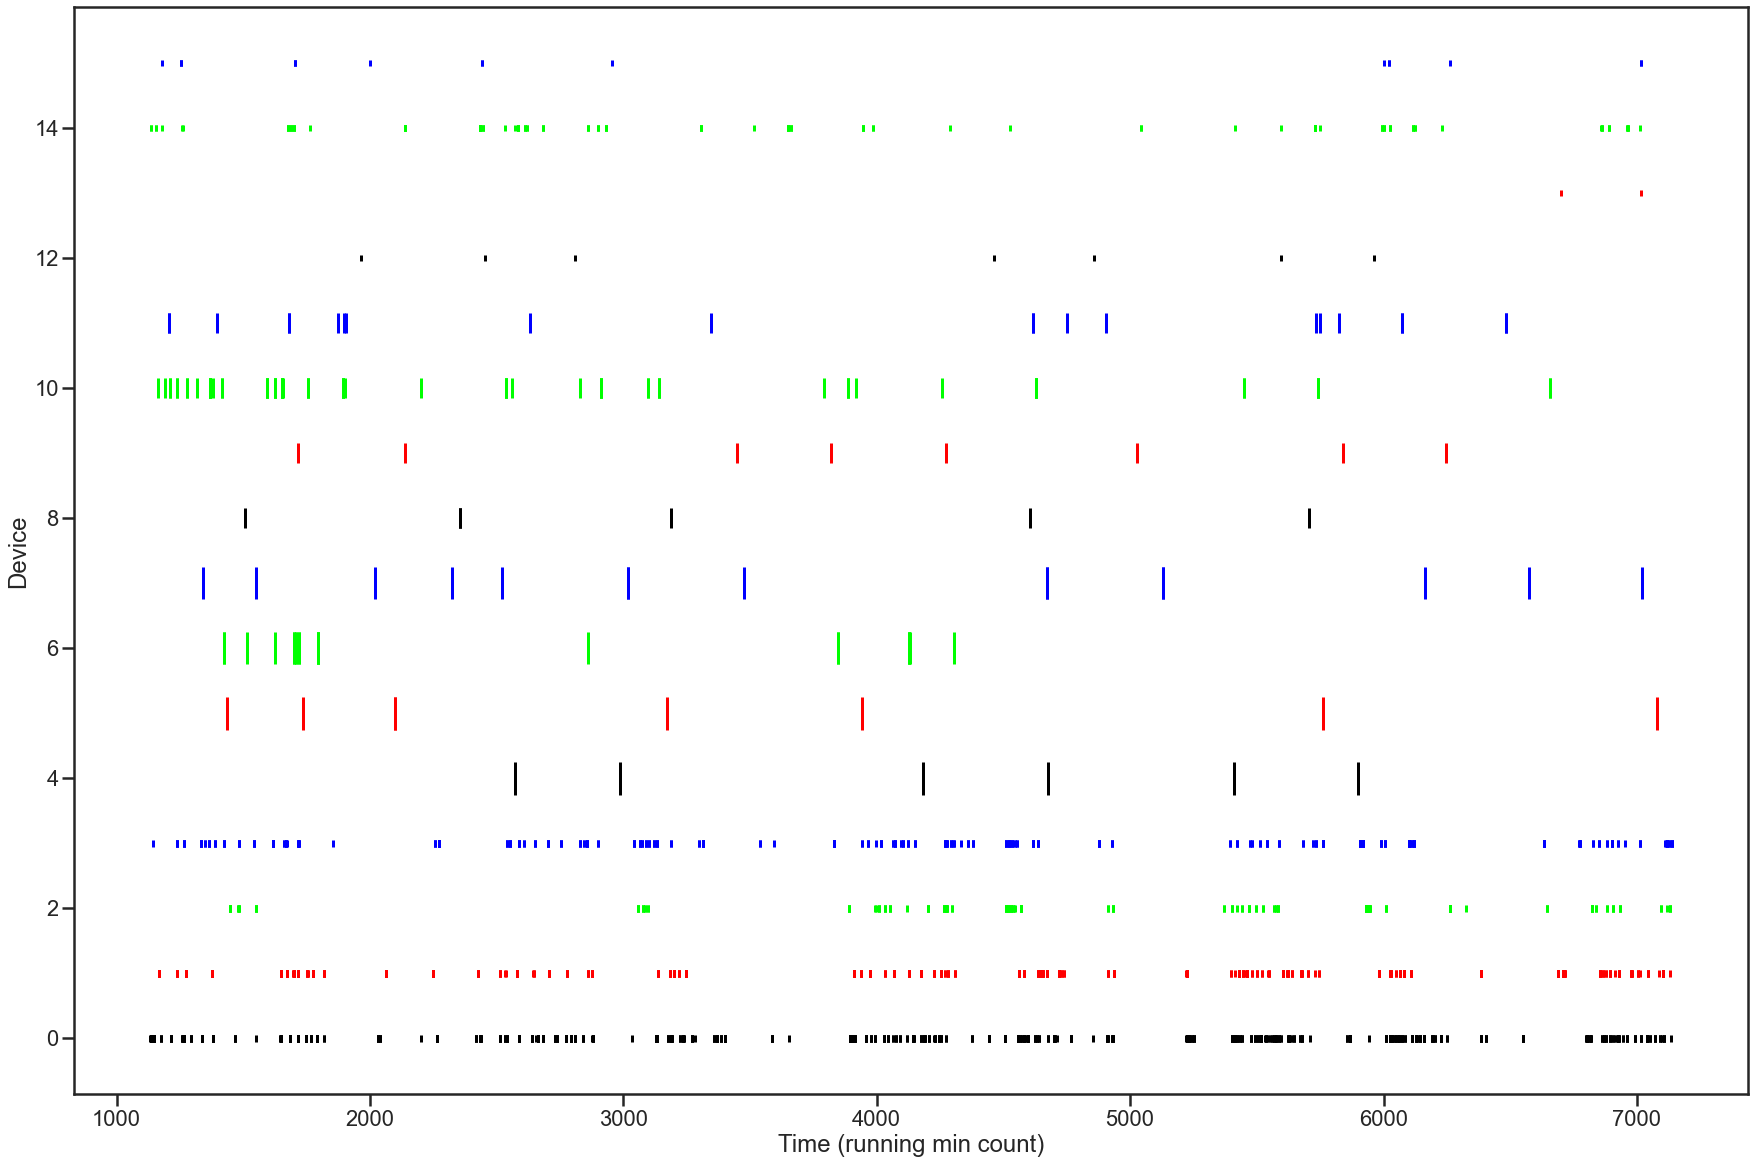

In [4]:
# Set the random seed for data generation

np.random.seed(39)

colorCodes = np.array([[0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1],
                      [0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1],
                      [0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1],
                      [0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1]])

                       

# Set spike colors for each neuron

lineSize = [0.1, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.3, 0.1, 0.1, 0.1, 0.1,]                               

param = 'VDM_min_count'

data = data_comb_final
data = data[data['TP'] == '3m']
data = data[data['VDM_day_count'] < 6]

data_1 = data[(data['IdRFID'] == '041A555D59')]
data_2 = data[(data['IdRFID'] == '041A555BCC')]
data_3 = data[(data['IdRFID'] == '041A55594C')]
data_4 = data[(data['IdRFID'] == '041A555DFF')]

data_V11 = data_1[data_1['variable'] == 'VDM_H20'][param].values
data_V21 = data_2[data_2['variable'] == 'VDM_H20'][param].values
data_V31 = data_3[data_3['variable'] == 'VDM_H20'][param].values
data_V41 = data_4[data_4['variable'] == 'VDM_H20'][param].values

data_V12 = data_1[data_1['variable'] == 'VDM_20_etoh'][param].values
data_V22 = data_2[data_2['variable'] == 'VDM_20_etoh'][param].values
data_V32 = data_3[data_3['variable'] == 'VDM_20_etoh'][param].values
data_V42 = data_4[data_4['variable'] == 'VDM_20_etoh'][param].values

data_V13 = data_1[data_1['variable'] == 'VDM_10_etoh'][param].values
data_V23 = data_2[data_2['variable'] == 'VDM_10_etoh'][param].values
data_V33 = data_3[data_3['variable'] == 'VDM_10_etoh'][param].values
data_V43 = data_4[data_4['variable'] == 'VDM_10_etoh'][param].values

data_V14 = data_1[data_1['variable'] == 'VDM_05_etoh'][param].values
data_V24 = data_2[data_2['variable'] == 'VDM_05_etoh'][param].values
data_V34 = data_3[data_3['variable'] == 'VDM_05_etoh'][param].values
data_V44 = data_4[data_4['variable'] == 'VDM_05_etoh'][param].values

data_array = np.array([data_V11, data_V21, data_V31, data_V41, 
                       data_V12, data_V22,  data_V32, data_V42,
                       data_V13, data_V23,  data_V33, data_V43,
                       data_V14, data_V24,  data_V34, data_V44])

# Draw a spike raster plot
plt.figure(figsize=(30,20))
plt.eventplot(data_array, color=colorCodes, linelengths = lineSize)  
plt.xlabel('Time (running min count)')
plt.ylabel('Device')

#plt.xticks(data_array, data_VDM_tidy_intake['datetime'], color='orange', rotation=45, )

plt.show()

In [11]:
data['IdRFID'].unique()

array(['041A555D59', '041A555BCC', '041A55594C', '041A555DFF',
       '041A55553F', '041A555B76', '041A555C80', '041A5554AF'],
      dtype=object)

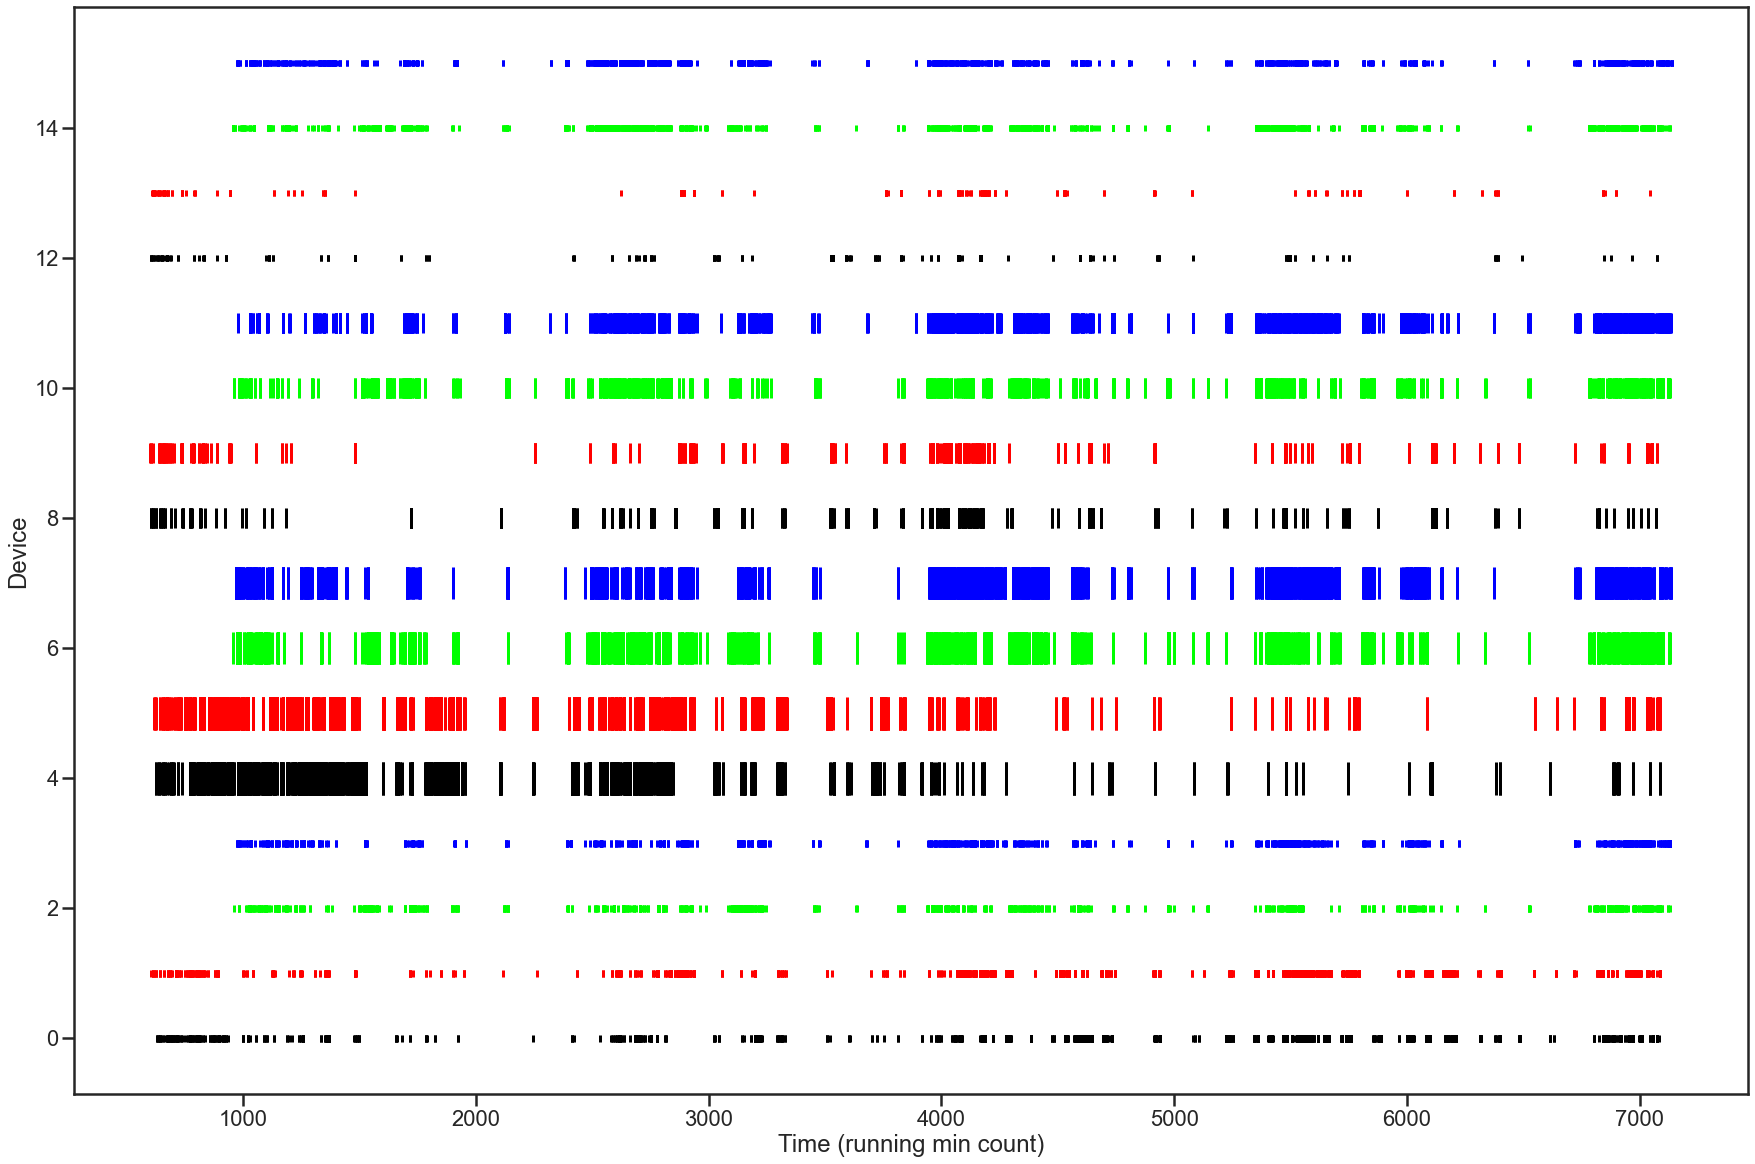

In [12]:
# Set the random seed for data generation

np.random.seed(39)


# Set different colors for each neuron

# Set different colors for each neuron

colorCodes = np.array([[0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1],
                      [0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1],
                      [0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1],
                      [0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1]])

                       

# Set spike colors for each neuron

lineSize = [0.1, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.3, 0.1, 0.1, 0.1, 0.1,]                               

param = 'RFID_min_count'

data = data_comb_final
data = data[data['TP'] == '1m']
data = data[data['RFID_day_count'] < 6]

data_1 = data[(data['IdRFID'] == '041A555D59')]
data_2 = data[(data['IdRFID'] == '041A555BCC')]
data_3 = data[(data['IdRFID'] == '041A55594C')]
data_4 = data[(data['IdRFID'] == '041A555DFF')]

data_V11 = data_1[data_1['unitLabel_drink'] == 'RFID_H20'][param].values
data_V21 = data_2[data_2['unitLabel_drink'] == 'RFID_H20'][param].values
data_V31 = data_3[data_3['unitLabel_drink'] == 'RFID_H20'][param].values
data_V41 = data_4[data_4['unitLabel_drink'] == 'RFID_H20'][param].values

data_V12 = data_1[data_1['unitLabel_drink'] == 'RFID_20'][param].values
data_V22 = data_2[data_2['unitLabel_drink'] == 'RFID_20'][param].values
data_V32 = data_3[data_3['unitLabel_drink'] == 'RFID_20'][param].values
data_V42 = data_4[data_4['unitLabel_drink'] == 'RFID_20'][param].values

data_V13 = data_1[data_1['unitLabel_drink'] == 'RFID_10'][param].values
data_V23 = data_2[data_2['unitLabel_drink'] == 'RFID_10'][param].values
data_V33 = data_3[data_3['unitLabel_drink'] == 'RFID_10'][param].values
data_V43 = data_4[data_4['unitLabel_drink'] == 'RFID_10'][param].values

data_V14 = data_1[data_1['unitLabel_drink'] == 'RFID_05'][param].values
data_V24 = data_2[data_2['unitLabel_drink'] == 'RFID_05'][param].values
data_V34 = data_3[data_3['unitLabel_drink'] == 'RFID_05'][param].values
data_V44 = data_4[data_4['unitLabel_drink'] == 'RFID_05'][param].values

data_array = np.array([data_V11, data_V21, data_V31, data_V41, 
                       data_V12, data_V22,  data_V32, data_V42,
                       data_V13, data_V23,  data_V33, data_V43,
                       data_V14, data_V24,  data_V34, data_V44])

# Draw a spike raster plot
plt.figure(figsize=(30,20))
plt.eventplot(data_array, color=colorCodes, linelengths = lineSize)  
plt.xlabel('Time (running min count)')
plt.ylabel('Device')

#plt.xticks(data_array, data_VDM_tidy_intake['datetime'], color='orange', rotation=45, )

plt.show()

In [117]:
data_1

,Unnamed: 0,Round,Cage,Animal,Injury,IdRFID,we_switch,weight_pre,notes,index,Cage_VDM,Cohort,TP,Drink,StartDate,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,ld_seg,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,VDM_RFID_timediff,VDM_day_count,VDM_hour_count,VDM_min_count,drink_bw,Unique
